In [39]:
# Pull prices of crypto picks from different exchanges, prompt user to buy from that exchange to get the best deal.


# Set up dev 
    # .env and APIs
######################################
#Pull picks Task
    # -Pull Assets per Exchange from tradingview (tradingview, api3) *~
    # -Present value and Daily Returns of the assets (pds1, api2)
    # - compare to Monte Carlo forcasts (pv vs 1yr | pv vs 6mon) ---> this will be added from aaron and alex
    # - create a monte carlo simulation for 7d trading using the 1 yrs data that = daily returns
######################################

#Prompt to Buy
#  Task [
    # Analyze and compare daily returns pre exchange
    # expected returns @ 95% lower and 

    # portiflio returns
###################################
#Will select the best exchange

# if asset A on exchangeA > exchangeB
    #print(select a)
# elif exhange b > exchange a
    #print(select b)
 # else 
    #print(still looking)

#######################################################   

# ccxt buy orders

In [40]:
#import libraries
from dotenv import load_dotenv
from tradingview_ta import TA_Handler, Interval, Exchange
import datetime
import os
import logging
import pandas as pd
from pathlib import Path
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [41]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [42]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(
    tradev_id,
    tradev_secret_key,
    chromedriver_path=None
)

In [43]:
# -Pull Assets per Exchange from tradingview (tradingview, api3)

crypto_one = input("enter the ticker of your first choice:")
exchange1 = input("enter the exchange of your choice:")
crypto_two = input("enter the ticker of your second choice:")
exchange2 = input("enter the exchange 2 of your choice:")

# Time to view
timeframe = "1D"
start_date = input("Enter start date || ex.2021-01-01")
end_date = input("Enter end date || ex.2021-01-01")
#timezone = input("America/Chicago")
#tz = timezone
startDate = pd.Timestamp(start_date)
endDate = pd.Timestamp(end_date)

print(f"Thank You! Lets get started!")

crypto_one_df = tv.get_hist(symbol=crypto_one,exchange=exchange1,interval=Interval.in_daily,n_bars=500)
crypto_two_df = tv.get_hist(symbol=crypto_two,exchange=exchange2,interval=Interval.in_daily,n_bars=500)
crypto_one_df.head(), crypto_two_df.head()


DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for coinbase:ETHUSD...


Thank You! Lets get started!


DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for kraken:LINKUSD...


(                              symbol    open    high     low   close  \
 datetime                                                               
 2020-05-07 19:00:00  coinbase:ETHUSD  212.50  217.00  207.20  211.59   
 2020-05-08 19:00:00  coinbase:ETHUSD  211.65  214.79  208.27  210.00   
 2020-05-09 19:00:00  coinbase:ETHUSD  210.06  210.06  180.01  187.73   
 2020-05-10 19:00:00  coinbase:ETHUSD  187.65  193.77  176.43  185.93   
 2020-05-11 19:00:00  coinbase:ETHUSD  185.93  192.89  185.79  190.10   
 
                            volume  
 datetime                           
 2020-05-07 19:00:00  156564.18492  
 2020-05-08 19:00:00  120178.89506  
 2020-05-09 19:00:00  479238.23724  
 2020-05-10 19:00:00  266403.28666  
 2020-05-11 19:00:00  114408.97765  ,
                              symbol     open     high      low    close  \
 datetime                                                                  
 2020-05-07 19:00:00  kraken:LINKUSD  3.77375  3.86422  3.69295  3.80876   

lets see how your selections have performed these last few months.:


(<AxesSubplot:xlabel='datetime'>,)

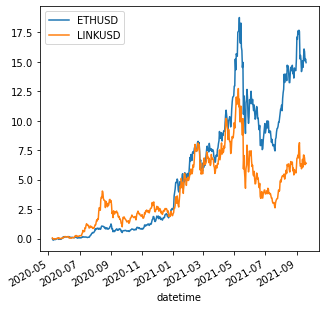

In [44]:
# -Present value and Daily Returns of the assets (pds1, api2
print(f'lets see how your selections have performed these last few months.:')
return_df = pd.DataFrame()
#Calculate returns
crypto_one_daily_returns = crypto_one_df['close'].pct_change().dropna()
crypto_two_daily_returns = crypto_two_df['close'].pct_change().dropna()
#Create a column in empty dataframe with return data
return_df[crypto_one] = crypto_one_daily_returns
return_df[crypto_two] = crypto_two_daily_returns

cumulative_returns = (1 + return_df).cumprod() -1
cumulative_returns.plot(figsize=(5,5)), 

In [45]:
if return_df is crypto_one > crypto_two:
    print(f"{crypto_one}, has upside")
else:
    print(f"Consider {crypto_two}, looks good")

Consider LINKUSD, looks good


In [46]:
import pandas as pd
from tradingview_ta import TA_Handler, Interval, Exchange
trading_api = TA_Handler(
    crypto_one,
    crypto_two
)

In [47]:
#coinbase
#link_coinbase = tv.get_hist(
#    symbol='LINKUSD',
#    exchange='COINBASE',
#    interval=Interval.in_daily,
#    n_bars=500
#)

#aave_coinbase = tv.get_hist(
#   symbol='LINKUSD',
#    exchange='COINBASE',
#   interval=Interval.in_daily,
#    n_bars=500
#)

#comp_coinbase = tv.get_hist(
#    symbol='COMPUSD',
#    exchange='COINBASE',
#    interval=Interval.in_daily,
#    n_bars=500
#)


#kraken
#link_kraken = tv.get_hist(
 #   symbol='LINKUSD',
  #  exchange='KRAKEN',
   # interval=Interval.in_daily,
    #n_bars=500
#)

#aave_kraken = tv.get_hist(
 #   symbol='LINKUSD',
  #  exchange='KRAKEN',
   # interval=Interval.in_daily,
    #n_bars=500
#)

#comp_kraken = tv.get_hist(
 #   symbol='COMPUSD',
  #  exchange='KRAKEN',
 #   interval=Interval.in_daily,
#    n_bars=500
#)

#comp_coinbase.sort_index()


#coinbase = pd.concat([comp_coinbase, aave_coinbase, link_coinbase], axis='columns', join='inner')
#kraken = pd.concat([aave_kraken, link_kraken, comp_kraken], axis='columns', join='inner')

#coinbase.head()
#kraken.head()